# prophetを使ってみる

- install方法: [prophet Installation](https://facebook.github.io/prophet/docs/installation.html)
- 公式ドキュメントのQuick Start: [prophet | Quick Start](https://facebook.github.io/prophet/docs/quick_start.html)

```{note}
[K_DM - 時系列 > 予測 > Prophet](https://k-datamining.github.io/dm-ts/ts/forecast/001-Prophet.html)でもProphetを扱っています。
こちらもご参照ください。
```

## 時系列データの作成
ダミーの時系列データを作成します。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet

sns.set(rc={"figure.figsize": (15, 8)})

Importing plotly failed. Interactive plots will not work.


## 実験用のデータを作成

<AxesSubplot:>

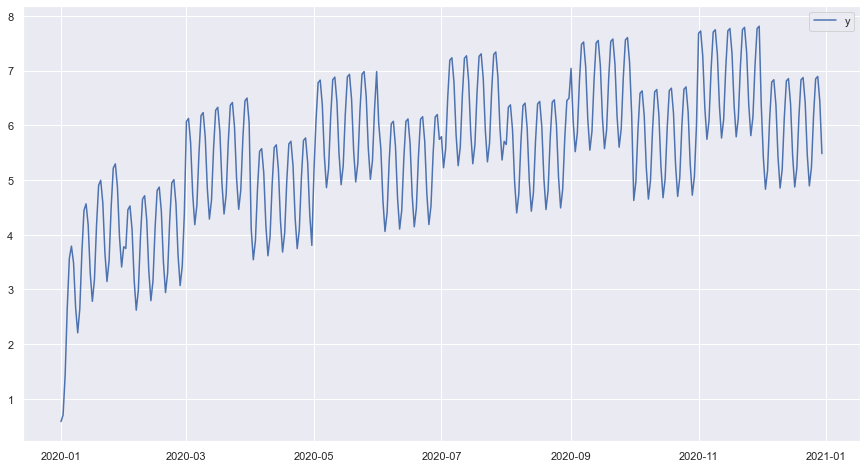

In [2]:
date = pd.date_range("2020-01-01", periods=365, freq="D")
y = [np.cos(di.weekday()) + di.month % 2 + np.log(i + 1) for i, di in enumerate(date)]

df = pd.DataFrame({"ds": date, "y": y})
df.index = date
sns.lineplot(data=df)

## Prophetの訓練

In [3]:
m = Prophet(yearly_seasonality=False, daily_seasonality=True)
m.fit(df)

Initial log joint probability = -24.5101


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       798.528    0.00821602       204.832           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       799.486    0.00040141       83.1101    5.02e-06       0.001      225  LS failed, Hessian reset 
     158       799.529    0.00027729       48.4168   3.528e-06       0.001      291  LS failed, Hessian reset 
     199        799.55   3.15651e-05       54.5691           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       799.553   3.54297e-05       56.7445    5.36e-07       0.001      397  LS failed, Hessian reset 
     267       799.556   6.19351e-08       44.7029      0.2081           1      490   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


## 予測用のデータを作成し予測を実行する

In [4]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

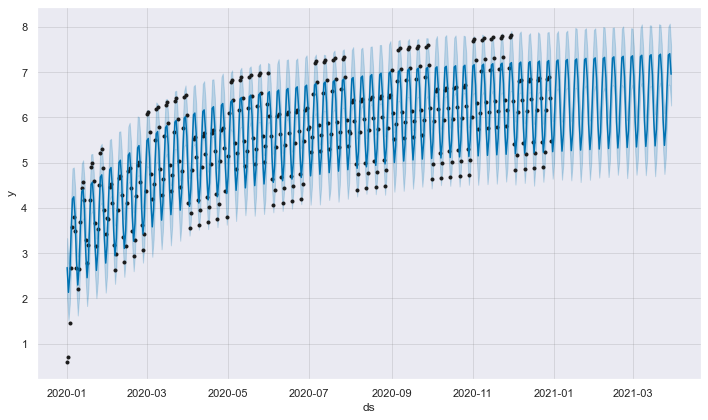

In [5]:
fig1 = m.plot(forecast)